In [1]:
import pandas as pd
import numpy as np

import geoplotlib
from geoplotlib.utils import DataAccessObject
from geoplotlib.utils import read_csv,epoch_to_str, BoundingBox
import geoplotlib.colors as colors
from geoplotlib.colors import colorbrewer

from IPython.display import Image # to import image

## Read and preprocess data

**About the Dataset**  
Lyft owns and operates a bike sharing service in the Bay Area called Baywheels. They operate in San Francisco, San Jose, and the Oakland/Berkeley area.

**Source**  
1. Kaggle Website: https://www.kaggle.com/jolasa/bay-area-bike-sharing-trips
Kaggle dataset is used in conjunction with a larger dataset from Lyft’s website. Timeperiod January to May 2019
2. Lyft website: https://www.lyft.com/bikes/bay-wheels/system-data
From the Lyft dataset a table of unique station information is derived, to pull in geographic data(latitude, longitude) for the beginning and end of each trip.

**Data Sampling & Cleaning**  
For this exercise, since the dataset is huge, it is sampled randomly to select 2% and cleaned thereafter to work with.

In [2]:
bikeData = pd.read_csv("BikeData.csv") 
bikeData.head()

month  trip_duration_sec  start_station_id  \
0      April                828              30.0   
1  Februrary                784              81.0   
2      April                443              76.0   
3      March                571              30.0   
4      March                219             153.0   

                               start_station_name  end_station_id  \
0  San Francisco Caltrain (Townsend St at 4th St)           110.0   
1                              Berry St at 4th St           323.0   
2                      McCoppin St at Valencia St             5.0   
3  San Francisco Caltrain (Townsend St at 4th St)            15.0   
4                            59th St at Horton St           156.0   

                                    end_station_name  bike_id   user_type  \
0   17th & Folsom Street Park (17th St at Folsom St)      707  Subscriber   
1                                 Broadway at Kearny     4597  Subscriber   
2       Powell St BART Station (Market St at 5th St)     5029  Subscriber   
3  San Francisco Ferry Building (Harry Bridges Pl...     6138  Subscriber   
4                          Stanford Ave at Hollis St     2780  Subscriber   

   member_birth_year member_gender  start_station_latitude  \
0             1985.0          Male               37.776598   
1             1994.0          Male               37.775880   
2             1964.0          Male               37.771662   
3             1982.0          Male               37.776598   
4             1995.0          Male               37.840945   

   start_station_longitude  end_station_latitude  end_station_longitude  \
0              -122.395282             37.763708            -122.415204   
1              -122.393170             37.798014            -122.405950   
2              -122.422423             37.783899            -122.408445   
3              -122.395282             37.795392            -122.394203   
4              -122.291360             37.838443            -122.288665   

         start_city          end_city  
0     San Francisco     San Francisco  
1     San Francisco     San Francisco  
2     San Francisco     San Francisco  
3     San Francisco     San Francisco  
4  Oakland/Berkeley  Oakland/Berkeley

**Bounding Box selects the geographical area for plotting based on cardinal points of a region. Here we are interested in Bike Sharing service for Bay Area California. Cardinal points are selected using www.openstreetmap.org.**

In [3]:
# Bounding box for Bay Area
bboxBay = BoundingBox(north =37.8304, west = -122.54701, south = 37.2227, east = -121.7381)
geoplotlib.set_bbox(bboxBay)

## Let's Start Exploring Bike Sharing using Geoplotlib

### Q1. Which city (out of the three) do you think has least/ most presence of Lyft Bikeshare stations? 

**Approach:**
Through dot plot
   1. Get 3 dataframes of 3 cities based on 'start_city' with column names: 'start_station_name','start_station_latitude','start_station_longitude'.
   2. Rename coordinate column names as 'lat','lon' that is compatible with dot plot format.
   3. Plot in the same graph.

In [4]:
# Step 1
# Segregate data into three dataframes based on start_city.

locationSF = bikeData[bikeData['start_city']== 'San Francisco'][['start_station_name','start_station_latitude','start_station_longitude']]
locationSJ = bikeData[bikeData['start_city']== 'San Jose'][['start_station_name','start_station_latitude','start_station_longitude']]
locationOB = bikeData[bikeData['start_city']== 'Oakland/Berkeley'][['start_station_name','start_station_latitude','start_station_longitude']]

# Step 2
# Rename column name 'start_station_latitude' and 'start_station_longitude' as 'lat','lon' respectively for all the three dataframes.

locationSF.columns = ['start_station_name','lat','lon']
locationSJ.columns = ['start_station_name','lat','lon']
locationOB.columns = ['start_station_name','lat','lon']

# Step 3
# Plot the graph of bike stations using Dot Plot in a single graph for better visualization. Remember to use bounding box. 
# You can use different color code for each city.

geoplotlib.dot(locationSF, 'r')
geoplotlib.dot(locationSJ, 'g')
geoplotlib.dot(locationOB, 'b')

geoplotlib.set_bbox(bboxBay)
geoplotlib.savefig('dotplot')
geoplotlib.show()


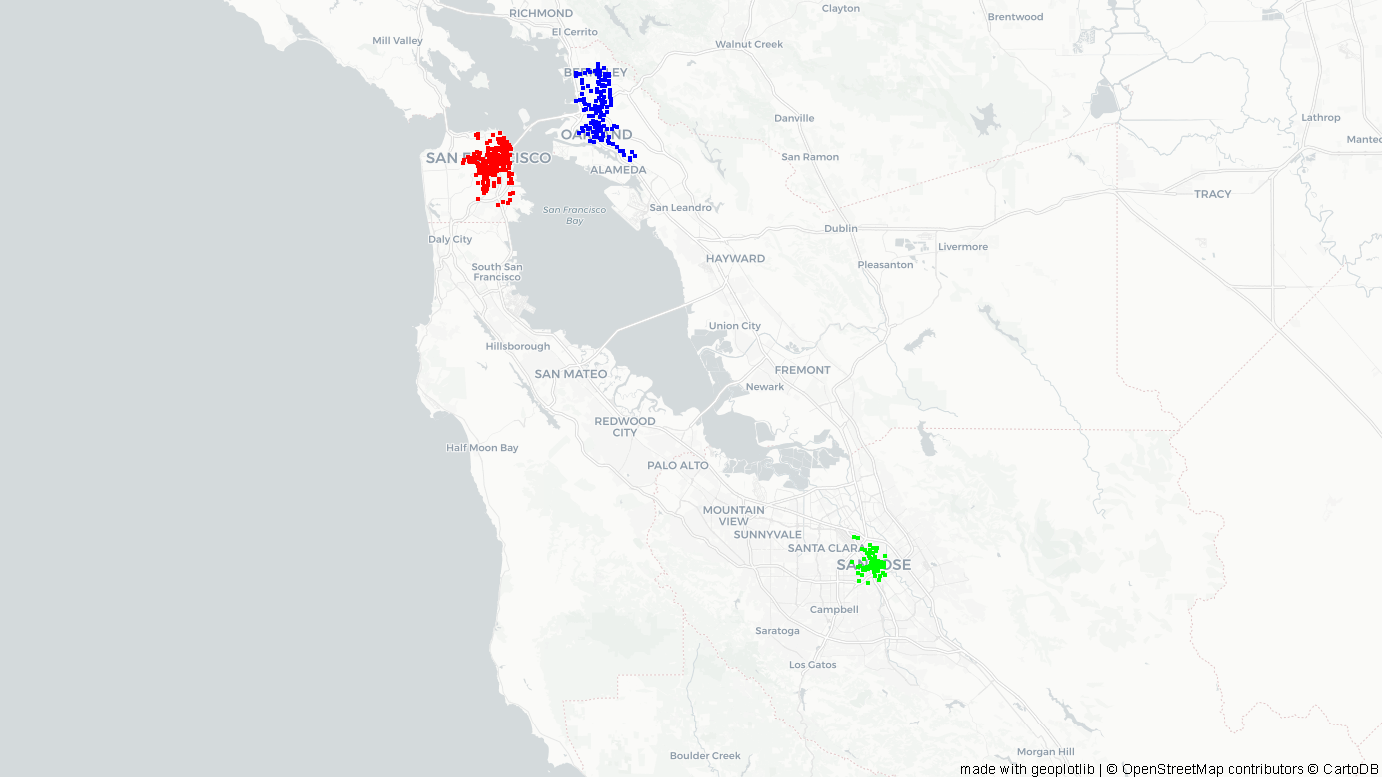

In [5]:
#from IPython.display import Image
Image('dotplot.png', width=800, height=450)

**Result:**  
    Graph shows San Francisco has highest number of bike stations as compared to other cities. San Jose, on the other hand, has the lowest number of bike stations.

### Q2 Show the three areas covered by Lyft bike service using convex hull graph and show start station name label of San Jose Stations.

In [6]:
# subset the dataframe to get labels of San Jose
sID = bikeData[bikeData['start_city']=='San Jose'][['start_station_name','start_station_latitude','start_station_longitude']]
sID.columns = ['start_station_name','lat','lon'] # get the appropriate format
sID_SJ = DataAccessObject.from_dataframe(sID) # Convert to DAO

In [7]:
# Use convex hull with layering
# Divide 3 regions on the basis of latitude and longitude and plot to get 3 regions

geoplotlib.convexhull(locationSF, col='r', fill =False)
geoplotlib.convexhull(locationSJ, col='g', fill =False)
geoplotlib.convexhull(locationOB, col='b', fill =False)

geoplotlib.labels( data = sID_SJ, label_column = 'start_station_name', color = 'b', font_size =10, anchor_x='center') # set parameters

geoplotlib.set_bbox(bboxBay)
#geoplotlib.savefig('convexhullplot')
geoplotlib.show()

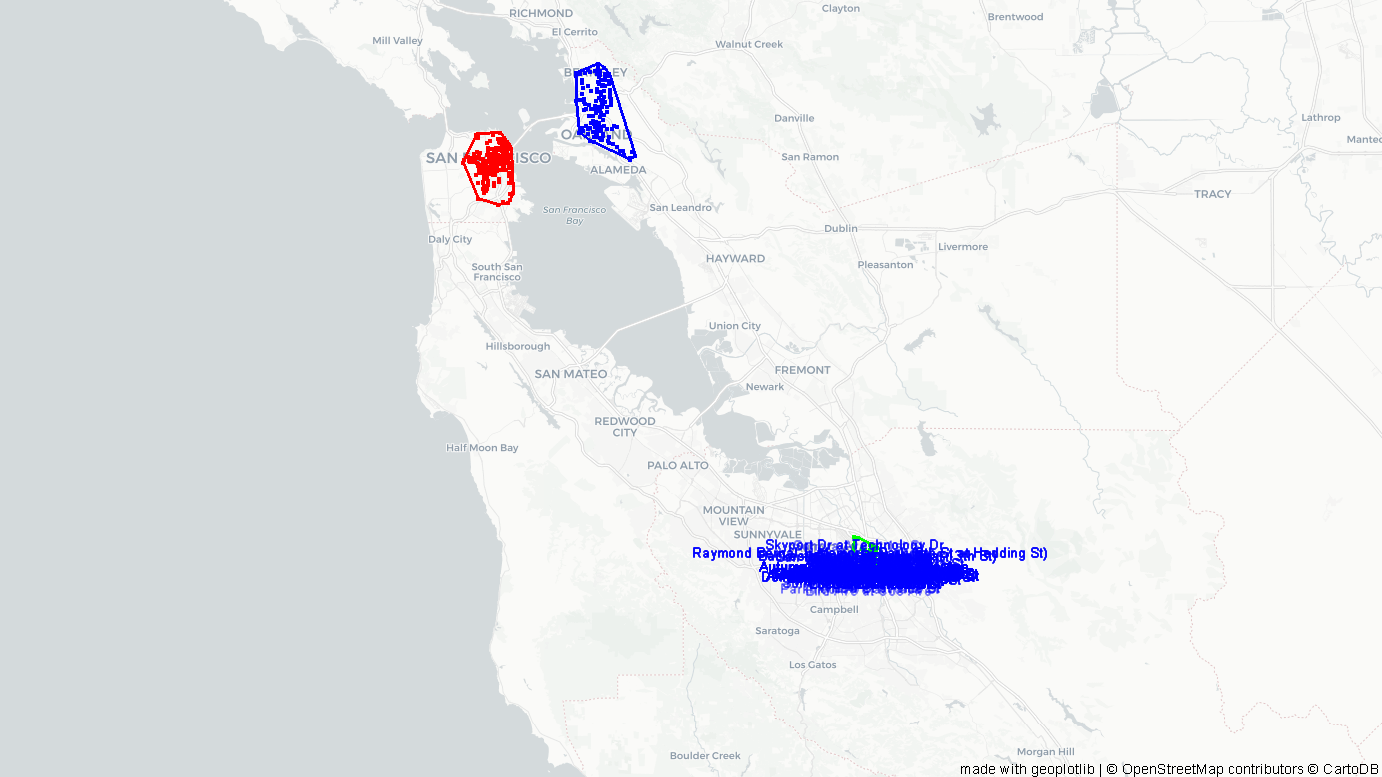

In [8]:
Image('convexhullplot.png', width=800, height=450)

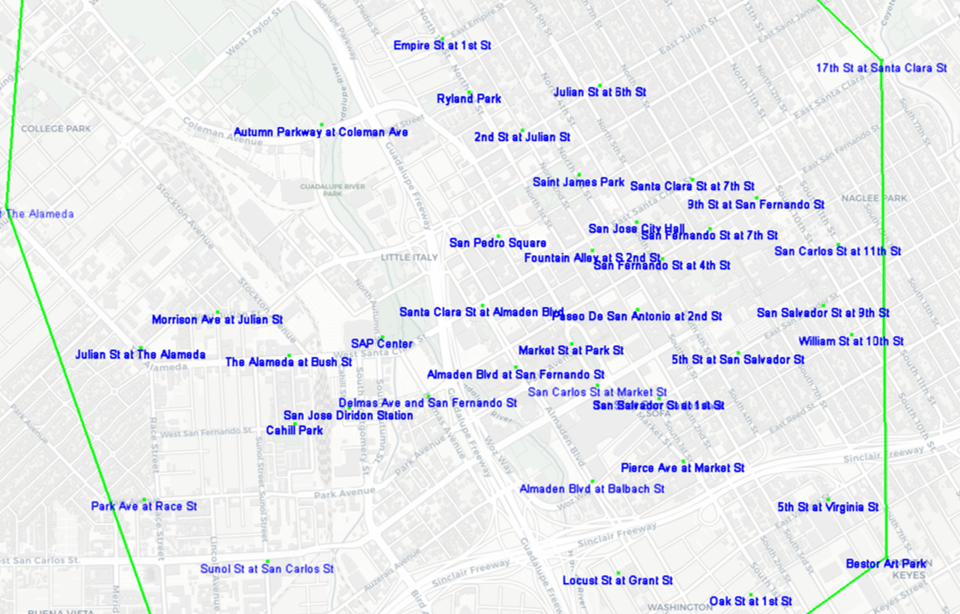

In [9]:
Image('Zoomlabel.png', width=800, height=450)

**Result**  
Bounding edge is made using farthest stations to form a polygon and represent a region.

## Now lets dig in further to explore SF area.

### Q3. Identify the density distribution of start stations in San Francisco. Which stations are most used? Identify those areas or streets in the map.

You will need to zoom into the graph to locate the street names.

**Approach:**
Through KDE plot
   1. Use the dataframe made for San Francisco in Question 1 and Convert dataframe to Data Access Object 
   2. Plot 

In [10]:
# Step 1
# create DAO from SF Dataframe 'start_station_name','lat','lon' (created as part of Q1). 
SFlocation = DataAccessObject.from_dataframe(locationSF)

# Step 2
# Use kde Heatmap with bandwidth 5,5 and sqrt scaling. You can play around with different parameters.
# Also show color bar parameter to depict the color scale.
geoplotlib.kde(locationSF, bw =[5,5], cmap = 'jet',scaling ='sqrt',show_colorbar=True)
geoplotlib.set_bbox(bboxBay)
#geoplotlib.savefig('kdeplot')
geoplotlib.show()

('smallest non-zero count', 2.1494359633152148e-09)
('max count:', 16.62570757538522)


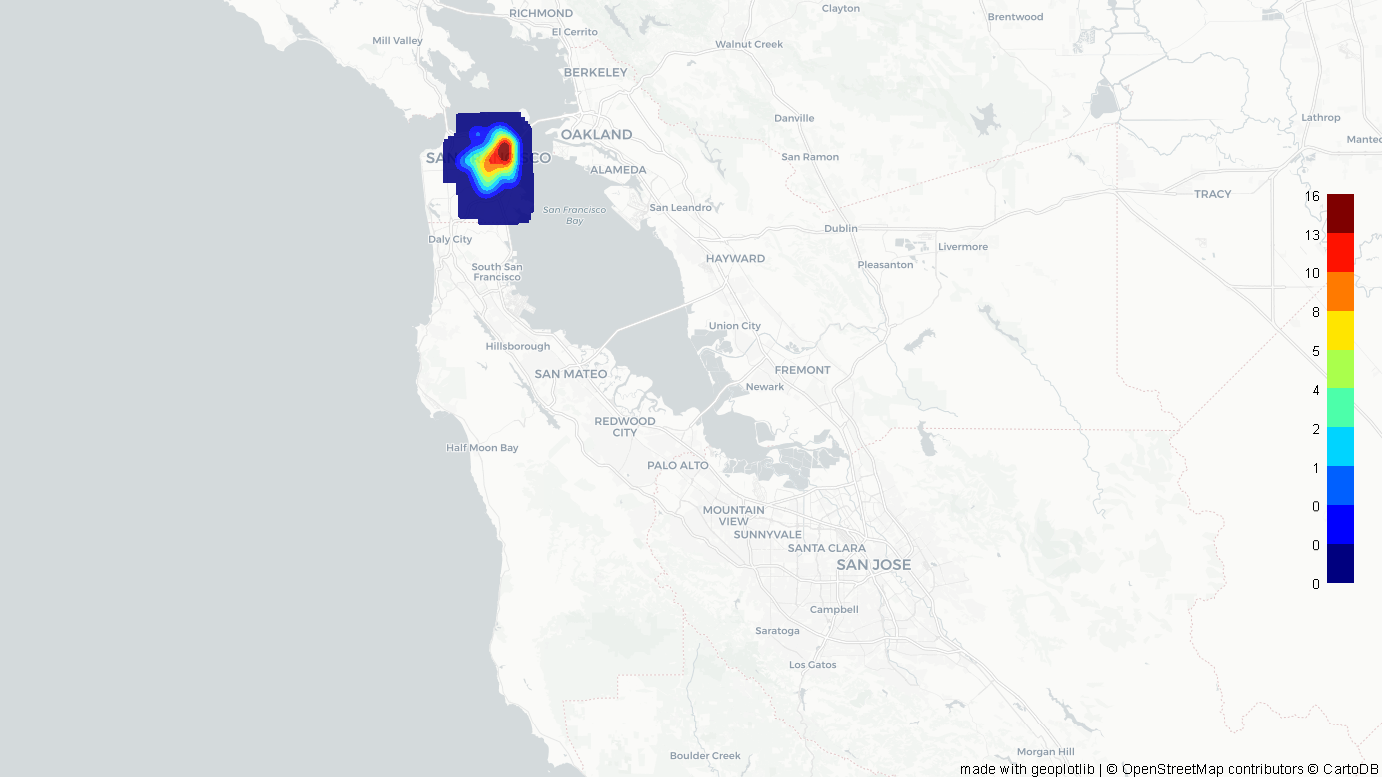

In [11]:
Image('kdeplot.png', width=800, height=450)

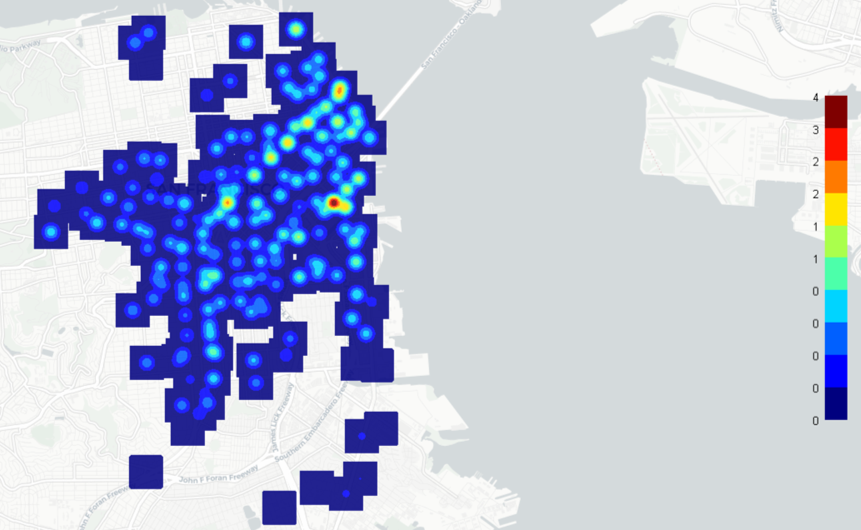

In [12]:
Image('Zoomkde.png', width=800, height=450)

**Result**  
Townsend St at 4th St shows the highest density of users. Also, you will observe, many stations on Market street serving as starting points for a bike trip.  


#### In a Voronoi tessellation, each pair of data points is separated by a (perpendicular) line such that it is equally distant from both the data points. As a result, the closer the data points, the smaller the cells.

### Q4. Lets visualize how densely placed are the start stations in San Francisco. Identify areas(station names) which have bike stations very closely located using the Voronoi tessellation rendering.

**Approach:**
   1. Plot for the San Francisco Data Access Object
   2. Show tooltip to display station name when you hover over it.
   3. Layer dot plot of San Francisco start stations to better visualize.  

In [13]:
# Step 1 & 2 
# Plot using voronoi and show tooltip
geoplotlib.voronoi(SFlocation, line_color='b', f_tooltip=lambda d:d['start_station_name'], line_width=1)
geoplotlib.set_smoothing(True)

# Step 2
# Overlap dot plot of SF start station to visualize stations over voronoi polygons.
geoplotlib.dot(SFlocation, 'r')

geoplotlib.set_bbox(bboxBay)
#geoplotlib.savefig('voronoiplot')
geoplotlib.show()

# Zoom in to see results

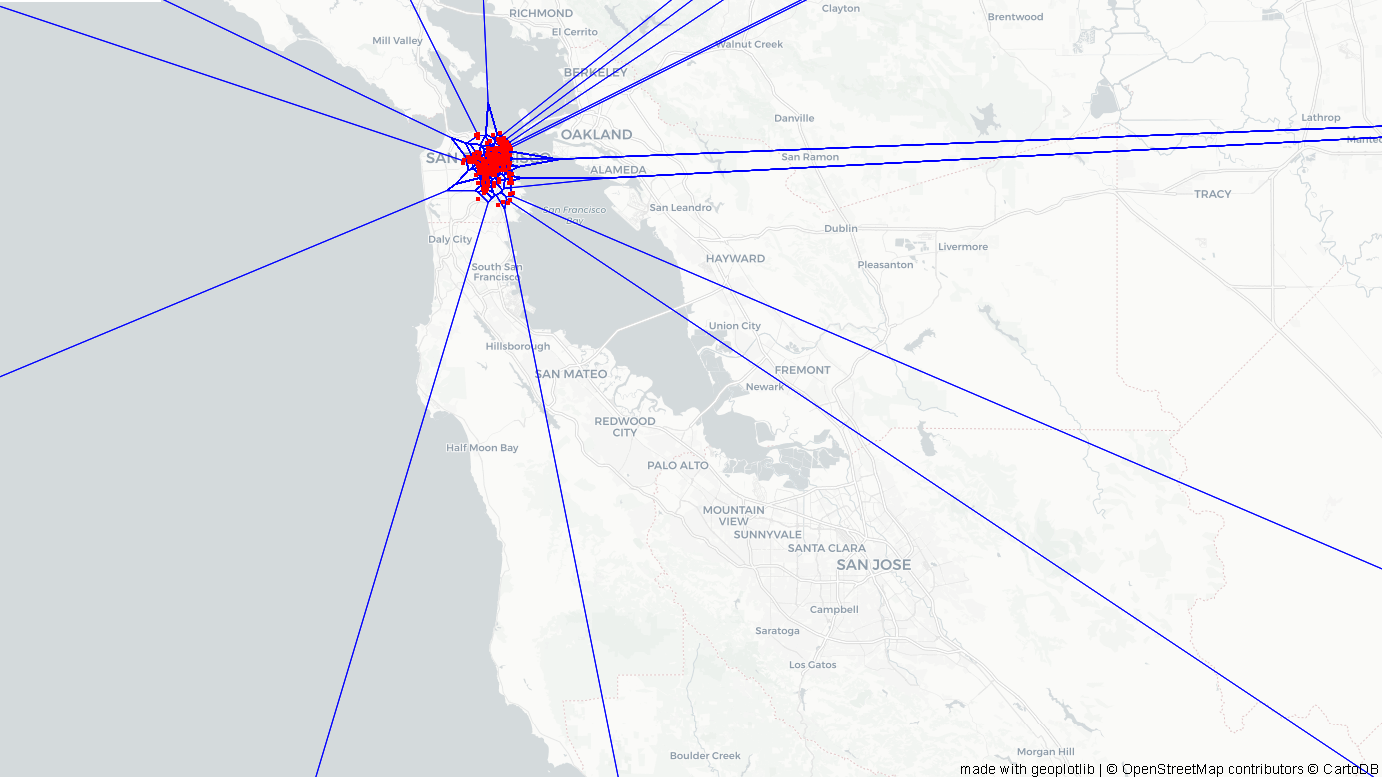

In [14]:
Image('voronoiplot.png', width=800, height=450)

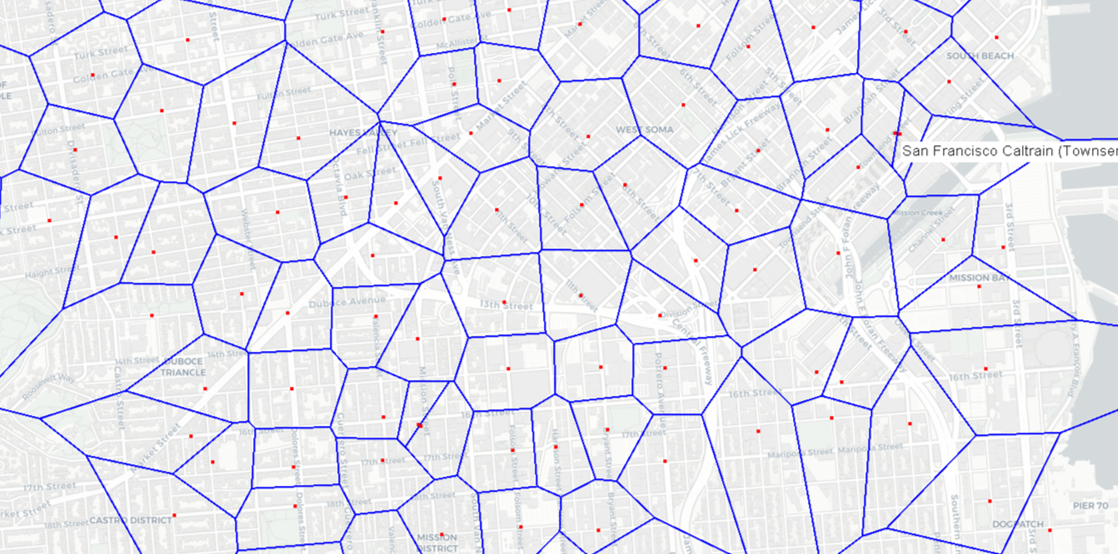

In [15]:
Image('ZoomVoronoiPlot.png', width=800, height=450)

**Result**
The graph shows two polygons of smallest area. In other words, we see two areas with stations located very close to each other. 
They are at:
1. 3rd str at Townsend st and Clay st at Battery St 
2. San Francisco CalTrain Station 2(Townsend st at 4th st) and San Francisco CalTrain Station(Townsend st at 4th st)

## Q5. Lets explore the routes of most used start station. 

Approach:
1. Find the most popular start station id based on the number of trips starting from that point. (We did that for you)
2. Plot the spatial graph showing all the routes starting from that most popular start station id.
3. Layer dot plot of San Francisco start stations for identify the stations and their spread in SF.

In [16]:
# use the dataframe for san francisco created as part of question 1 to find the start station 
# calculate the number of trips starting from each stations
top_station_list1 = bikeData.groupby(['start_station_id']).size().reset_index(name = 'number of trips') 

# sort the data in descending order on number of trips
top_station_list1.sort_values(by='number of trips',ascending=False, inplace = True )

# Select the first record (with highest number of trips) to get the most popular station
top_station1=top_station_list1.start_station_id.iloc[0]

# create a dataframe selecting all trips starting from most popular station
top_station_trips1 = bikeData[bikeData['start_station_id']==top_station1]

In [17]:
# spatial graph for top station 

geoplotlib.graph(top_station_trips1 , 
                 src_lat= 'start_station_latitude', src_lon ='start_station_longitude', 
                 dest_lat= 'end_station_latitude', dest_lon = 'end_station_longitude', 
                 color ='jet', alpha =200, linewidth=2) 

# Layer dot plot of SF start station to visualize stations
geoplotlib.dot(locationSF[['lat','lon']], 'g')
#geoplotlib.savefig('SpatialPlot')
geoplotlib.show()

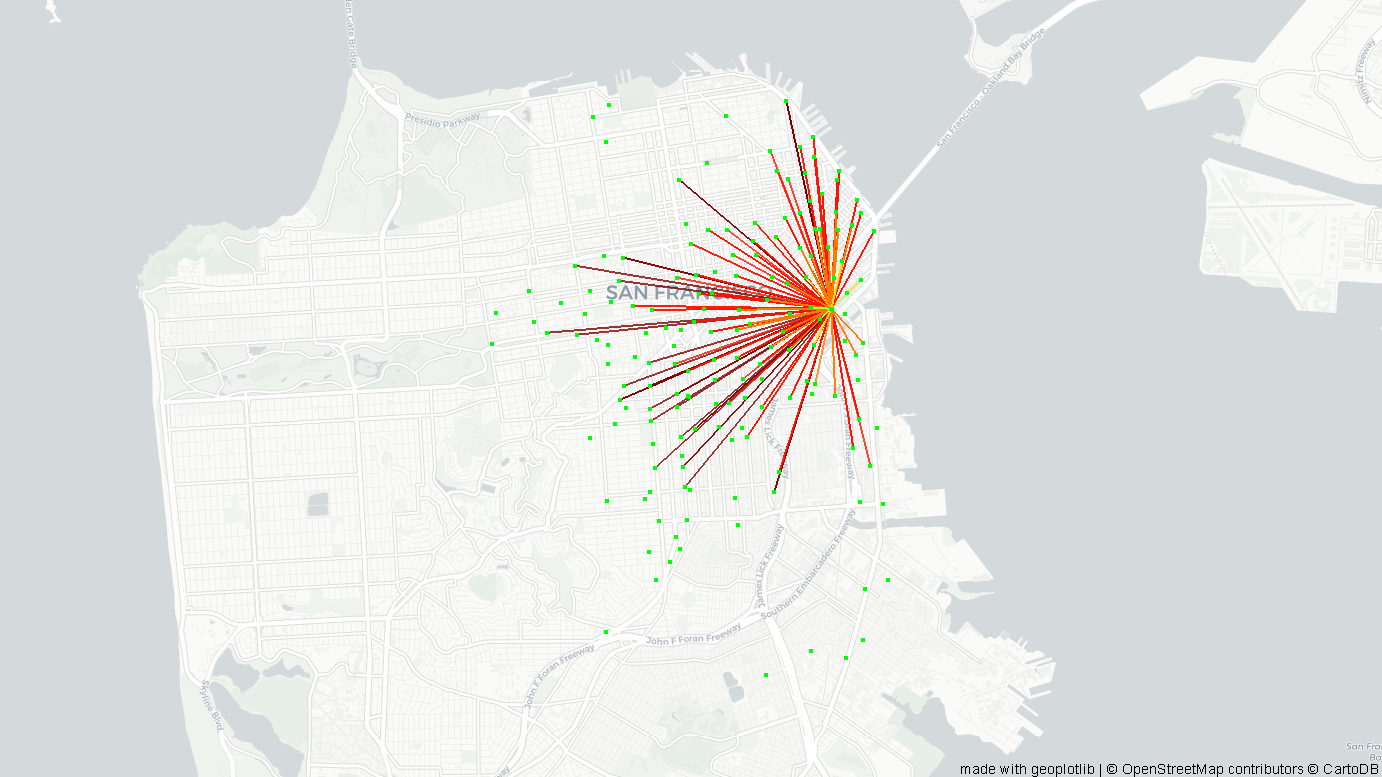

In [18]:
Image('SpatialPlot.png', width=800, height=450)

**Result**  
From the graph we can see the spread of the routes from the most popular station. Further this feature can be explored to see the spread of other stations and their routes.

## Lets go a step further to explore if we see a pattern amongst Subscribers and Customers for this starting station.

Approach:
   1. Extract 2 subsets from top_station_list1, one for Subscriber and other for Customer based on 'user_type'.
   2. Now plot the spatial graph for Customer and Subscriber with layering.
   3. Also, layer dot plot of San Francisco start stations for better visualization.  

In [19]:
# Step 1
# Make the 2 subsets  
top_station_s = top_station_trips1[top_station_trips1['user_type']=='Subscriber']
top_station_c= top_station_trips1[top_station_trips1['user_type']=='Customer']

In [20]:
# Step 2
# Plot the spatial graphs with layering

geoplotlib.graph(top_station_s , 
                 src_lat= 'start_station_latitude', src_lon ='start_station_longitude', 
                 dest_lat= 'end_station_latitude', dest_lon = 'end_station_longitude', 
                 color ='Blues', alpha =200, linewidth=3) 

geoplotlib.graph(top_station_c , 
                 src_lat= 'start_station_latitude', src_lon ='start_station_longitude', 
                 dest_lat= 'end_station_latitude', dest_lon = 'end_station_longitude', 
                 color ='cool', alpha =200, linewidth=3) 

# Step 3
# Add dot plot for SF location as top layer

geoplotlib.dot(locationSF[['lat','lon']], 'g')
#geoplotlib.savefig('UserSpatialPlot')
geoplotlib.show()

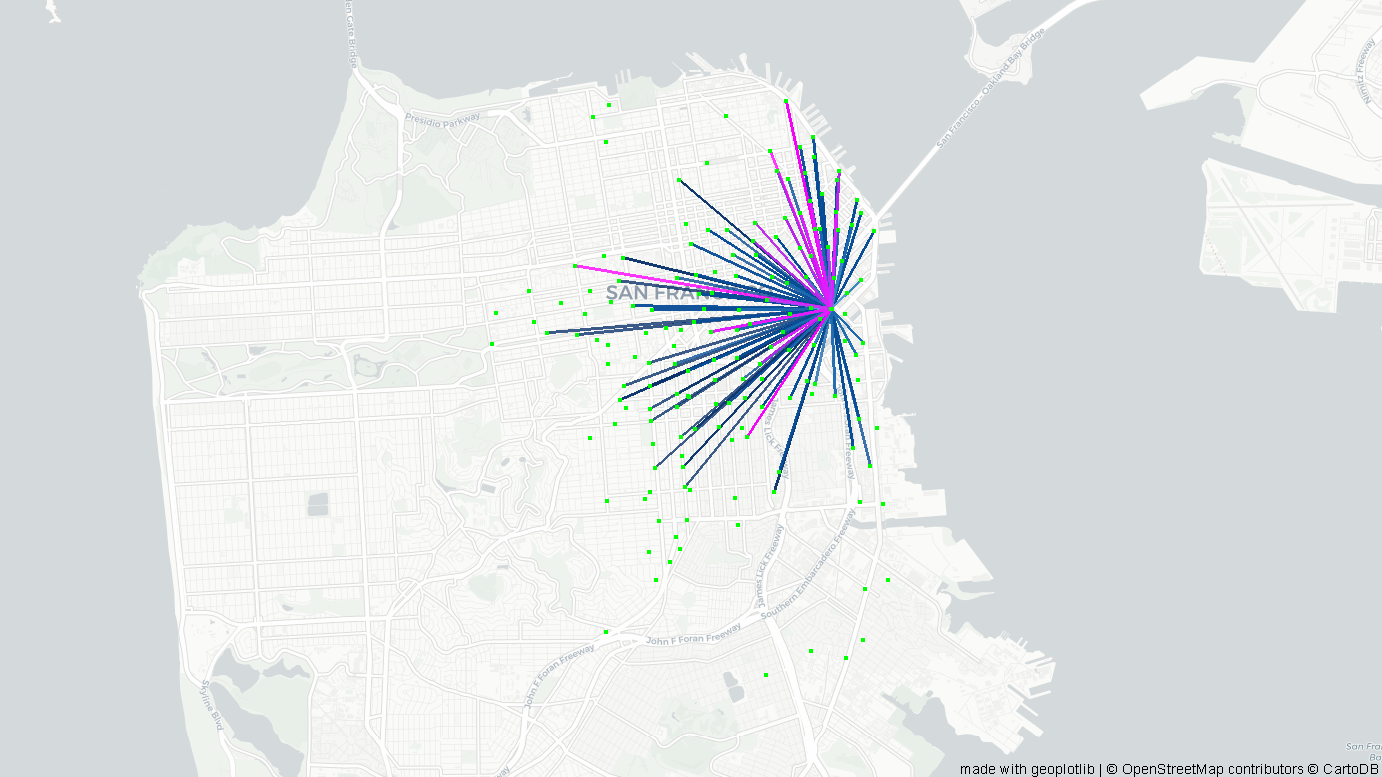

In [21]:
Image('UserSpatialPlot.png', width=800, height=450)

**Result**  
Overall we see Subscriber uses the bike sharing service much more than a Customer.
It seem Customer takes some particular routes maybe they are tourists.